### MNIST

###### http://yann.lecun.com/exdb/mnist/ (data) 
###### note : use any one paper all of them used MNIST
###### http://ieeexplore.ieee.org/document/6296535/ (another paper)

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential,Model
from keras.layers import Dropout ,Activation,AveragePooling2D, normalization,Convolution2D,MaxPooling2D
from keras.layers import Dense, Flatten, Reshape, Input
from keras.layers.merge import add
from keras import optimizers
from keras.utils import np_utils
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
x = pd.read_csv('/home/vasu/Downloads/train (1).csv')

In [3]:
x = np.array(x)
X_train = x[:,1:]
Y_train = x[:,0]

In [4]:
X_train = X_train/255.0
X_train = X_train.reshape(X_train.shape[0],28,28)
Y_train = np_utils.to_categorical(Y_train)
print X_train.shape, Y_train.shape

(42000, 28, 28) (42000, 10)


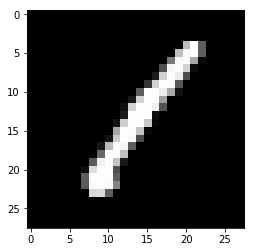

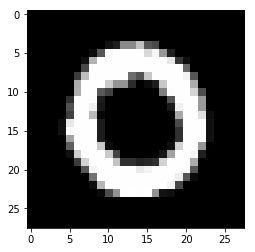

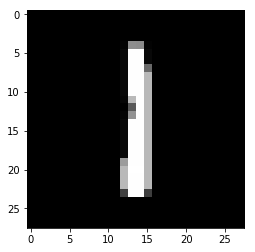

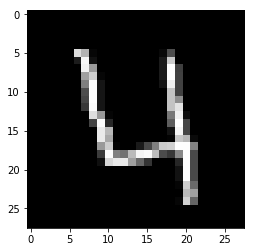

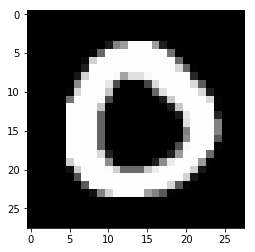

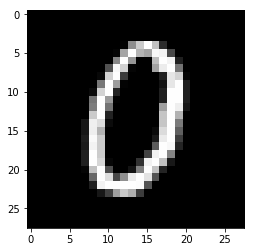

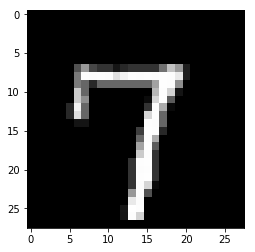

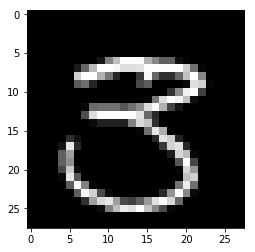

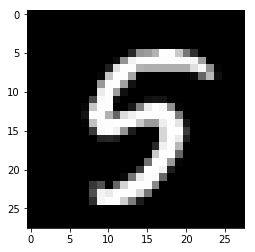

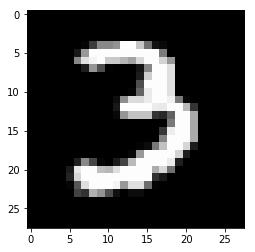

In [5]:
for ix in range(10):
    plt.figure(ix)
    plt.imshow(X_train[ix], interpolation='none', cmap='gray')
plt.show()

In [6]:
X_train = X_train.reshape((X_train.shape[0],28,28,1))

In [7]:

inp = Input(shape=(28,28,1))
x1 = Convolution2D( 32,(3,3))(inp)

r1_a1 = Activation('relu')(x1)
r1_w1 = Convolution2D(32,( 3,3))(r1_a1)
r1_a2 = Activation('relu')(r1_w1)
r1_d1 = Dropout(0.2)(r1_a2)
r1_w2 = Convolution2D(32,( 3,3))(r1_d1)

x2 = Convolution2D(16,( 3,3))(r1_w2)

r2_a1 = Activation('relu')(x2)
r2_w1 = Convolution2D(16,( 3,3))(r2_a1)
r2_a2 = Activation('relu')(r2_w1)
r2_d1 = Dropout(0.2)(r2_a2)
r2_w2 = Convolution2D(16,( 3,3))(r2_d1)

x3 = Convolution2D(8,( 3,3))(r2_w2)
acti = Activation('relu')(x3)
av_pool = MaxPooling2D((2,2))((acti))
f1 = Flatten()(av_pool)
fc1 = Dense(32)(f1)
a1 = Activation('relu')(fc1)
fc3 = Dense(10)(a1)
a3 = Activation('softmax')(fc3)

model = Model(outputs=a3, inputs=inp)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        9248      
__________

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
hist = model.fit(X_train,Y_train,
                 epochs=10,
                 shuffle=True,
                 batch_size=256,
                 validation_split=0.20)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 69s - loss: 0.6260 - acc: 0.7913 - val_loss: 0.2722 - val_acc: 0.9117
Epoch 2/10
33600/33600 [==============================] - 57s - loss: 0.1789 - acc: 0.9448 - val_loss: 0.1168 - val_acc: 0.9642
Epoch 3/10
33600/33600 [==============================] - 57s - loss: 0.1159 - acc: 0.9653 - val_loss: 0.0792 - val_acc: 0.9762
Epoch 4/10
33600/33600 [==============================] - 57s - loss: 0.0929 - acc: 0.9713 - val_loss: 0.0745 - val_acc: 0.9795
Epoch 5/10
33600/33600 [==============================] - 57s - loss: 0.0771 - acc: 0.9770 - val_loss: 0.0817 - val_acc: 0.9760
Epoch 6/10
33600/33600 [==============================] - 57s - loss: 0.0666 - acc: 0.9800 - val_loss: 0.0578 - val_acc: 0.9811
Epoch 7/10
33600/33600 [==============================] - 57s - loss: 0.0618 - acc: 0.9805 - val_loss: 0.0542 - val_acc: 0.9821
Epoch 8/10
33600/33600 [==============================]

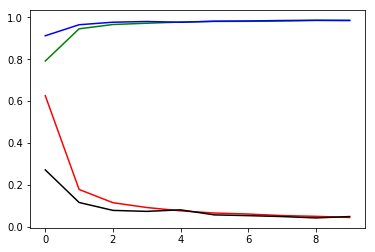

In [10]:
plt.plot(hist.history['acc'],'g')
plt.plot(hist.history['val_acc'],'b')
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'black')